In [7]:
import json
import requests
import time

from json import JSONDecodeError

text = {"text": """ Champa was an Indic civilization that flourished along
the coasts of what is now central and southern Vietnam for roughly a one
thousand-year period between 500 and 1500 AD. The original Chams 
were probably colonists from the Indonesian islands, who adopted as 
their principal vocations those of trade, shipping, and piracy. 
Their cities were ports of call on important trade routes linking India, 
China and the Indonesian islands. The history of Champa was one of 
intermittent conflict and cooperation with the people of Java, the Khmer 
of Angkor in Cambodia and the Đại Việt of what is now northern Vietnam. 
It was to the that Champa finally lost its independence. 
The artistic legacy of Champa consists primarily of sandstone sculptures 
- both sculpture in the round and relief sculpture - and brick buildings. 
Some metal statues and decorative items have also survived. Much of the 
remaining art expresses religious themes, and though some pieces would
have been purely decorative, others would have served important functions
in the religious life of the Chams, which synthesized elements of Hinduism 
(especially Saivism), Buddhism and indigenous cults."""}

In [8]:
sending = requests.post('http://localhost:8080/text', json=text)

In [9]:
print(sending.status_code)

200


In [10]:
while True:
    try:
        parcel = requests.get('http://localhost:8080/result')
        print(parcel.status_code)
        tree = json.loads(parcel.json())
        print(tree)
        print(tree["text"])
        break
    except JSONDecodeError:
        time.sleep(20)
        continue

200
200
200
200
200
200
200
{'text': 'what', 'id': 0, 'nodes': [{'text': 'it', 'id': 1, 'nodes': []}, {'text': 'the indonesian islands', 'id': 2, 'nodes': [{'text': 'trade', 'id': 7, 'nodes': []}, {'text': 'indonesian', 'id': 8, 'nodes': []}]}, {'text': 'northern vietnam', 'id': 3, 'nodes': [{'text': 'vietnam', 'id': 6, 'nodes': []}, {'text': 'cambodia', 'id': 9, 'nodes': []}]}, {'text': 'the [UNK]', 'id': 4, 'nodes': []}, {'text': 'the people', 'id': 5, 'nodes': []}]}
what


In [11]:
import pydot

graph = pydot.Dot(graph_type='graph')

print(tree['nodes'])

first_level = tree['text']
second_level = [node['text'] for node in tree['nodes']]
print(second_level)

for node in tree['nodes']:
    edge = pydot.Edge(first_level, node['text'])
    graph.add_edge(edge)
    print(node['nodes'])
    
    if node['nodes']:
        for node_3rd in node['nodes']:
            edge = pydot.Edge(node['text'], node_3rd['text'])
            graph.add_edge(edge)

[{'text': 'it', 'id': 1, 'nodes': []}, {'text': 'the indonesian islands', 'id': 2, 'nodes': [{'text': 'trade', 'id': 7, 'nodes': []}, {'text': 'indonesian', 'id': 8, 'nodes': []}]}, {'text': 'northern vietnam', 'id': 3, 'nodes': [{'text': 'vietnam', 'id': 6, 'nodes': []}, {'text': 'cambodia', 'id': 9, 'nodes': []}]}, {'text': 'the [UNK]', 'id': 4, 'nodes': []}, {'text': 'the people', 'id': 5, 'nodes': []}]
['it', 'the indonesian islands', 'northern vietnam', 'the [UNK]', 'the people']
[]
[{'text': 'trade', 'id': 7, 'nodes': []}, {'text': 'indonesian', 'id': 8, 'nodes': []}]
[{'text': 'vietnam', 'id': 6, 'nodes': []}, {'text': 'cambodia', 'id': 9, 'nodes': []}]
[]
[]


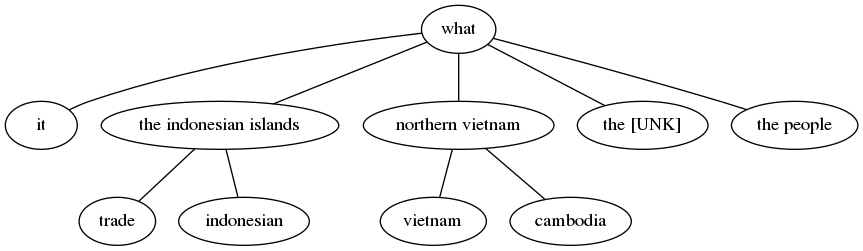

In [12]:
from IPython.display import Image, display

im = Image(graph.create_png())
display(im)